<a href="https://colab.research.google.com/github/M-SAAD-BIN-MAZHAR/SentimentAnalysis/blob/master/IMDBSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Choose kaggle.json when prompted


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"msaadbinmazhar","key":"441dd9d1822cf614497da12344b75301"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip imdb-dataset-of-50k-movie-reviews.zip


Archive:  imdb-dataset-of-50k-movie-reviews.zip
replace IMDB Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: IMDB Dataset.csv        


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/IMDB Dataset.csv')

In [ ]:
df.head(10)

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive
5,probabl alltim favorit movi stori selfless sac...,positive
6,sure would like see resurrect date seahunt ser...,positive
7,thi show wa amaz fresh innov idea 70 first air...,negative
8,encourag posit comment thi film wa look forwar...,negative
9,like origin gut wrench laughter like thi movi ...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df.duplicated().sum()

418

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(49582, 2)

In [ ]:




df['sentiment'].value_counts() #Balanced Data Set

,count
sentiment,
positive,24884
negative,24698


In [ ]:
df.describe()

,review,sentiment
count,49582,49582
unique,49582,2
top,One of the other reviewers has mentioned that ...,positive
freq,1,24884


# **IMPORTING IMPORTANT LIBRARIES**

In [ ]:
!pip install gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 52.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 12.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatibl

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
nltk.download('stopwords')
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
nltk.download('punkt')
nltk.download('wordnet')
from bs4 import BeautifulSoup
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from wordcloud import WordCloud
from sklearn.linear_model import SGDClassifier
import gensim
from gensim.models import Word2Vec,KeyedVectors
stopwords=set(stopwords.words('english'))
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

# **CLEANING OF TEXT**

In [ ]:
df['review'][8]

'encourag posit comment thi film wa look forward watch thi film bad mistak ive seen 950 film thi truli one worst aw almost everi way edit pace storylin act soundtrack film onli song lame countri tune play less four time film look cheap nasti bore extrem rare happi see end credit film onli thing prevent give thi 1score harvey keitel thi far hi best perform least seem make bit effort one keitel obsess onli'

In [ ]:
def strip_html(text):
  soap=BeautifulSoup(text,'html.parser')
  return soap.get_text()
def remove_between_square_brackets(text):
  return re.sub(r'\[[^]]*\]','',text)
def remove_special_characters(text,remove_digits=True):
  pattern=r'[^a-zA-z0-9\s]'
  text=re.sub(pattern,'',text)
  return text
def apply_stemmer(text): #if reult is bad check lematizer
  ps=PorterStemmer()
  return " ".join([ps.stem(word) for word in text.split()])
  return text
def remove_stopwords(text):
    return ' '.join(word for word in text.split() if word not in stopwords)


def denoise_text(text):
  text=text.lower()
  text=strip_html(text)
  text=remove_between_square_brackets(text)
  text=remove_special_characters(text)
  text=apply_stemmer(text)
  text=remove_stopwords(text)
  return text

In [ ]:
df['review']=df['review'].apply(denoise_text)

In [ ]:
df['review'][0]

'one review ha mention watch 1 oz episod youll hook right thi exactli happen meth first thing struck oz wa brutal unflinch scene violenc set right word go trust thi show faint heart timid thi show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti wa surreal couldnt say wa readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison exp

# **SPLITTING OF DATASET**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['review'],df['sentiment'],test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39665,)
(9917,)
(39665,)
(9917,)


# **BAG OF WORDS**

In [ ]:
cv=CountVectorizer()
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)
print(x_train_cv.shape)
print(x_test_cv.shape)

(39665, 155812)
(9917, 155812)


# **TFIDF VECTORIZER**

In [ ]:
tf=TfidfVectorizer()
x_train_tf=tf.fit_transform(x_train)
x_test_tf=tf.transform(x_test)
print(x_train_tf.shape)
print(x_test_tf.shape)

(39665, 155812)
(9917, 155812)


# **Word2Vec**

In [ ]:
sentences = df['review'].apply(nltk.word_tokenize).tolist()

In [ ]:
#For using word2vec it is import to use it before word_tokenizer
model=gensim.models.Word2Vec(window=10,min_count=2,workers=4)
model.build_vocab(sentences,progress_per=1000)
model.train(sentences,total_examples=model.corpus_count,epochs=model.epochs)

(28699802, 31839770)

# **Labeling Sentiments**

In [ ]:
lb=LabelEncoder()
y_train=lb.fit_transform(y_train)
y_test=lb.transform(y_test)

In [ ]:
y_train.shape

(39665,)

# **Applying Algorithms**

# **Logisitic Regression Using Bag of words**

In [ ]:
lr=LogisticRegression(max_iter=600)
lr.fit(x_train_cv,y_train)
y_pred=lr.predict(x_test_cv)
print(accuracy_score(y_test,y_pred))

0.879096500957951


In [ ]:
confusion_matrix(y_test,y_pred)

array([[4281,  658],
       [ 541, 4437]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4939
           1       0.87      0.89      0.88      4978

    accuracy                           0.88      9917
   macro avg       0.88      0.88      0.88      9917
weighted avg       0.88      0.88      0.88      9917



# **Logisitic Regression Using Tfidf**

In [ ]:
lr=LogisticRegression(max_iter=600)
lr.fit(x_train_tf,y_train)
y_pred=lr.predict(x_test_tf)
print(accuracy_score(y_test,y_pred))

0.8856509024906726


In [ ]:
confusion_matrix(y_test,y_pred)

array([[4285,  654],
       [ 480, 4498]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4939
           1       0.87      0.90      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917



# **Logistic Regression Using Word2Vec**

In [ ]:


def get_avg_vector(tokens, model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Convert each tokenized review into one vector
X = np.vstack([get_avg_vector(tokens, model) for tokens in sentences])


In [ ]:
y = (df['sentiment'] == 'positive').astype(int).values


In [ ]:
X_train_wv, X_test_wv, y_train_wv, y_test_wv = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_wv, y_train_wv)

print("Training Accuracy:", clf.score(X_train_wv, y_train_wv))
print("Test Accuracy:", clf.score(X_test_wv, y_test_wv))

Training Accuracy: 0.8681961426950712
Test Accuracy: 0.8624584047595039


# **MultinomialNB Classifier**

In [ ]:
mb=MultinomialNB()
mb.fit(x_train_cv,y_train)
y_pred=mb.predict(x_test_cv)
print(accuracy_score(y_test,y_pred))


0.8493496016940607


In [ ]:
confusion_matrix(y_test,y_pred)

array([[4278,  661],
       [ 833, 4145]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      4939
           1       0.86      0.83      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917



# **MultinomialNB Classifier using Tfidf**

In [ ]:
mb=MultinomialNB()
mb.fit(x_train_tf,y_train)
y_pred=mb.predict(x_test_tf)
print(accuracy_score(y_test,y_pred))

0.8624584047595039


In [ ]:
gb=GaussianNB()
gb.fit(X_train_wv, y_train_wv)

print("Training Accuracy:", gb.score(X_train_wv, y_train_wv))
print("Test Accuracy:", gb.score(X_test_wv, y_test_wv))



Training Accuracy: 0.7791503844699357
Test Accuracy: 0.7742260764344056


In [ ]:
rd=RandomForestClassifier()
rd.fit(x_train_cv,y_train)
y_pred=rd.predict(x_test_cv)
print(accuracy_score(y_test,y_pred))

0.8448119390944843


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      4939
           1       0.84      0.85      0.85      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



In [ ]:
confusion_matrix(y_test,y_pred)

array([[4138,  801],
       [ 738, 4240]])

In [ ]:
rd=RandomForestClassifier()
rd.fit(x_train_tf,y_train)
y_pred=rd.predict(x_test_tf)
print(accuracy_score(y_test,y_pred))

In [ ]:
svc=SVC()
svc.fit(x_train_cv,y_train)
y_pred=svc.predict(x_test_cv)
print(accuracy_score(y_test,y_pred)) #You can use but taking too much time

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
print(confusion_matrix(y_test,y_pred))

In [ ]:
sdc=SGDClassifier()
sdc.fit(x_train_cv,y_train)
y_pred=sdc.predict(x_test_cv)
print(accuracy_score(y_test,y_pred))

array([0, 0, 1, ..., 0, 1, 1])

# **500 MOST FREQUENT  POSITIVE WORDS**

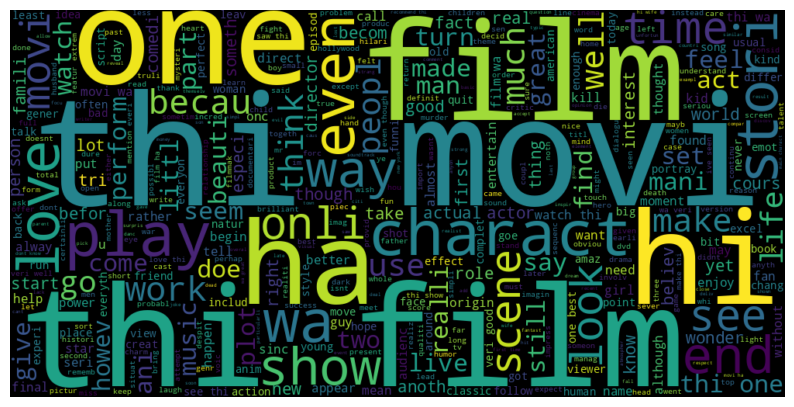

In [ ]:
positive_reviews = df[df['sentiment'] == 'positive']
positive_text = " ".join(review for review in positive_reviews.review)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(positive_text)

plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()


# **500 MOST FREQUENT NEGATIVE WORDS**

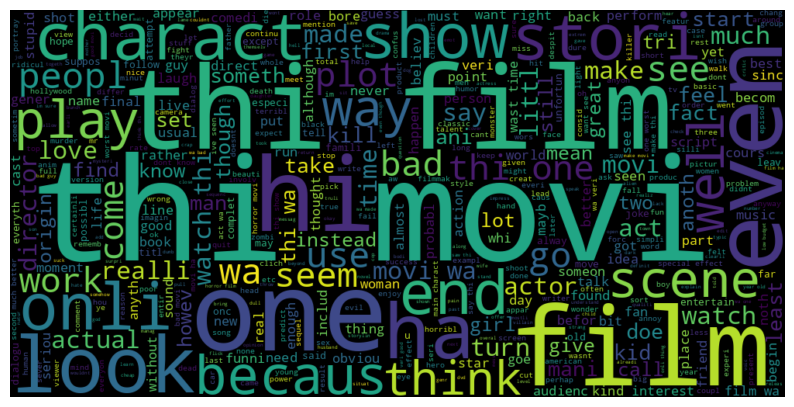

In [ ]:
positive_reviews = df[df['sentiment'] == 'negative']
positive_text = " ".join(review for review in positive_reviews.review)
WC = WordCloud(width=1000, height=500, max_words=500, min_font_size=5).generate(positive_text)

plt.figure(figsize=(10,10))
plt.imshow(WC, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import pickle

In [ ]:
pickle.dump(lr,open('lr.pkl','wb'))
pickle.dump(tf,open('tf.pkl','wb'))

In [ ]:
def predict(text):

  cleaned_text=denoise_text(text)
  tf_text=tf.transform([cleaned_text])
  return lr.predict(tf_text)[0]



In [ ]:
predict('basic famili littl boy jake think zombi hi closet hi parent fight timethi movi slower soap opera suddenli jake decid becom rambo kill zombieok first go make film must decid thriller drama drama movi watchabl parent divorc argu like real life jake hi closet total ruin film expect see boogeyman similar movi instead watch drama meaningless thriller spots3 10 well play parent descent dialog shot jake ignor')

1

In [ ]:
predict('probabl alltim favorit movi stori selfless sacrific dedic nobl caus preachi bore never get old despit seen 15 time last 25 year paul luka perform bring tear eye bett davi one veri truli sympathet role delight kid grandma say like dressedup midget children onli make fun watch mother slow awaken happen world roof believ startl dozen thumb theyd thi movi')

1

In [ ]:
predict('Movie pixel was a litle bit dull')

0

In [ ]:
#0==>negative
#1==>Postive
df.sample(5)

,review,sentiment
10974,sharp polit comment postur come age stori thi ...,positive
22539,wa deal cloth dress like someth late 70 earli ...,negative
25132,habit alway like read hate review ani given mo...,positive
38186,artist speak thi beauti movieth cinematographi...,positive
44977,heart pound erot drama word come mind think se...,positive
